# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [3]:
try:
    geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
    geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    geo_data_0 = pd.read_csv('/Users/v.rakhaev/Desktop/Yandex/sprint_11/geo_data_0.csv')
    geo_data_1 = pd.read_csv('/Users/v.rakhaev/Desktop/Yandex/sprint_11/geo_data_1.csv')
    geo_data_2 = pd.read_csv('/Users/v.rakhaev/Desktop/Yandex/sprint_11/geo_data_2.csv')
    

In [4]:
display(geo_data_0.head(2))
display(geo_data_1.head(2))
display(geo_data_2.head(2))

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.22117,105.280062
1,2acmU,1.334711,-0.340164,4.36508,73.037750


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697


In [5]:
display(geo_data_0.info())
display(geo_data_1.info())
display(geo_data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [6]:
display(geo_data_0.shape)
display(geo_data_1.shape)
display(geo_data_2.shape)

(100000, 5)

(100000, 5)

(100000, 5)

In [7]:
display(geo_data_0.isna().sum())
display(geo_data_1.isna().sum())
display(geo_data_2.isna().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [8]:
display(geo_data_0.duplicated().sum())
display(geo_data_1.duplicated().sum())
display(geo_data_2.duplicated().sum())

0

0

0

<AxesSubplot:title={'center':'geo_data_0'}>

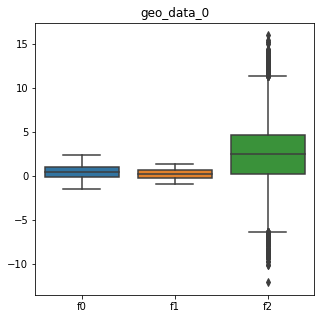

In [9]:
plt.figure(figsize=(5,5))
plt.title('geo_data_0')
sns.boxplot(geo_data_0[['f0','f1','f2']])

<AxesSubplot:title={'center':'geo_data_1'}>

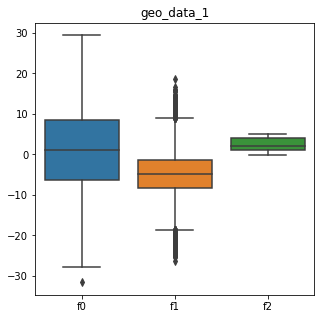

In [10]:
plt.figure(figsize=(5,5))
plt.title('geo_data_1')
sns.boxplot(geo_data_1[['f0','f1','f2']])

<AxesSubplot:title={'center':'geo_data_2'}>

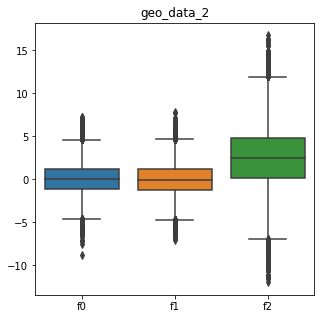

In [11]:
plt.figure(figsize=(5,5))
plt.title('geo_data_2')
sns.boxplot(geo_data_2[['f0','f1','f2']])

In [12]:
def upper_fence(df):
    return df.quantile(0.75) + (df.quantile(0.75) - df.quantile(0.25))*1.5

In [13]:
def lower_fence(df):
    return df.quantile(0.25) - (df.quantile(0.75) - df.quantile(0.25))*1.5


<AxesSubplot:title={'center':'geo_data_0, correlation'}>

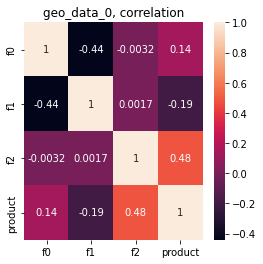

In [14]:
plt.figure(figsize = (4,4))
plt.title('geo_data_0, correlation')
sns.heatmap(geo_data_0[['f0','f1','f2','product']].corr(), annot = True)


<AxesSubplot:title={'center':'geo_data_1, correlation'}>

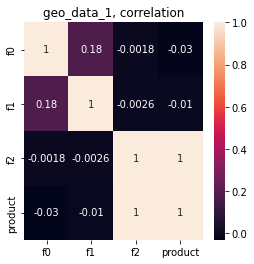

In [15]:
plt.figure(figsize = (4,4))
plt.title('geo_data_1, correlation')
sns.heatmap(geo_data_1[['f0','f1','f2','product']].corr(), annot = True)

<AxesSubplot:title={'center':'geo_data_2, correlation'}>

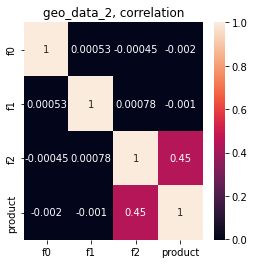

In [16]:
plt.figure(figsize = (4,4))
plt.title('geo_data_2, correlation')
sns.heatmap(geo_data_2[['f0','f1','f2','product']].corr(), annot = True)

### Выводы: 
- во всех выборках имеются экстримальные выбросы, возможно потребуется дропнуть для лучшего обучения модели
- в 1-ом регионе между признаками f2 и product полная положительная зависимость, возможно потребуется удаление одного признака для лучшего обучения модели

## Обучение и проверка модели

In [17]:
def model(df):
    target = df['product']
    features = df.drop(['id','product'] , axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    mse = mean_squared_error(target_valid, predicted_valid)
    print("RMSE =", round(mse ** 0.5,2))
    print("Predicted_valid_mean =", round(predicted_valid.mean(),2))
    return predicted_valid, target_valid

In [18]:
geo_data_0_pred, geo_data_0_real = model(geo_data_0)

RMSE = 37.58
Predicted_valid_mean = 92.59


In [19]:
geo_data_1_pred, geo_data_1_real  = model(geo_data_1)

RMSE = 0.89
Predicted_valid_mean = 68.73


In [20]:
geo_data_2_pred, geo_data_2_real = model(geo_data_2)

RMSE = 40.03
Predicted_valid_mean = 94.97


## Выводы
- минимальная ошибка предсказания в 0-ом регионе -  37.58 тыс. барр.
- максимальный средний показатель во 2-ом регионе - 94.97 тыс. барр.

## Подготовка к расчёту прибыли

In [21]:
development_budget = 10_000_000_000
revenue = 450_000
oil_well_dev = 500
oil_well_used = 200

In [22]:
breakeven = development_budget/(revenue*oil_well_used)
print('Точка безубыточности при использовании 200 скважин =', round(breakeven,2))

Точка безубыточности при использовании 200 скважин = 111.11


In [23]:
#Реальные средние значения валидационной выборки
#Средние значения очень близки к реальным
display(geo_data_0_real.mean())
display(geo_data_1_real.mean())
display(geo_data_2_real.mean())

92.07859674082927

68.72313602435997

94.88423280885438

In [24]:
display((geo_data_0_real >= breakeven).sum()/len(geo_data_0_pred))
display((geo_data_1_real >= breakeven).sum()/len(geo_data_1_pred))
display((geo_data_2_real >= breakeven).sum()/len(geo_data_2_pred))

0.36244

0.16744

0.38164

### Выводы
Точка безубыточности при использовании 200 скважин = 111.11  
В 0 регионе более 36% скважин имеют запасы превышающие точку безубыточности  
В 1 регионе более 17% скважин имеют запасы превышающие точку безубыточности  
В 2 регионе более 38% скважин имеют запасы превышающие точку безубыточности

## Расчёт прибыли и рисков 

In [26]:
def profit(valid_real, valid_pred):
    valid_pred = pd.Series(valid_pred).sort_values(ascending = False)
    valid_real = valid_real.reset_index(drop=True)
    valid_real = valid_real.iloc[valid_pred.index].reset_index(drop=True).iloc[:oil_well_used]
    return round(valid_real.sum()*revenue-development_budget,2)

In [27]:
print('Выручка с 200 лучших скважин 0-ого региона', profit(geo_data_0_real, geo_data_0_pred))
print('Выручка с 200 лучших скважин 1-ого региона', profit(geo_data_1_real, geo_data_1_pred))
print('Выручка с 200 лучших скважин 2-ого региона', profit(geo_data_2_real, geo_data_2_pred))

Выручка с 200 лучших скважин 0-ого региона 3320826043.14
Выручка с 200 лучших скважин 1-ого региона 2415086696.68
Выручка с 200 лучших скважин 2-ого региона 2710349963.6


In [29]:
def bootstrap(valid_real,valid_pred):
    state = np.random.RandomState(12345)
    samples = []
    for i in range(1000):
        sample_pred = pd.Series(valid_pred).sample(n = oil_well_dev, replace=True, random_state=state)
        sample_final = profit(valid_real, sample_pred) 
        samples.append(sample_final)        
    samples = pd.Series(samples)
    print('Риск убытка',(samples<0).sum()/len(samples),'%')
    lower = samples.quantile(0.025)
    upper = samples.quantile(0.975)
    print('Средняя выручка', round(samples.mean(),1),'руб')
    print('95 % доверительный интервал =',round(lower,1),'руб','-',round(upper,1),'руб')
    

**Bootstrap для 0 - ого региона**

In [30]:
bootstrap(geo_data_0_real,geo_data_0_pred)

Риск убытка 0.069 %
Средняя выручка 396164984.8 руб
95 % доверительный интервал = -111215545.9 руб - 909766941.6 руб


**Bootstrap для 1 - ого региона**

In [31]:
bootstrap(geo_data_1_real,geo_data_1_pred)

Риск убытка 0.015 %
Средняя выручка 456045105.8 руб
95 % доверительный интервал = 33820509.4 руб - 852289453.9 руб


**Bootstrap для 2 - ого региона**

In [32]:
bootstrap(geo_data_2_real,geo_data_2_pred)

Риск убытка 0.076 %
Средняя выручка 404403866.6 руб
95 % доверительный интервал = -163350413.4 руб - 950359574.9 руб


### Выводы
- в результате расчетов максимальная средняя выручка составила в первом регионе (456 млн)
- наименее рискованный также оказался 1-ый регион (Риск убытка 0.015 %)